## Mini project 3: Cars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars.csv', sep =',')
data.head()

,Unnamed: 0,speed,dist
0,1,4.0,2.0
1,2,4.0,10.0
2,3,7.0,4.0
3,4,7.0,22.0
4,5,8.0,16.0


In [3]:
data.tail()

,Unnamed: 0,speed,dist
50,51,24.0,92.0
51,52,NaN,92.0
52,53,24.0,93.0
53,54,24.0,120.0
54,55,25.0,85.0


In [4]:
data.shape

(55, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  55 non-null     int64  
 1   speed       52 non-null     float64
 2   dist        53 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.4 KB


In [6]:
data.describe()

,Unnamed: 0,speed,dist
count,55.00000,52.000000,53.000000
mean,28.00000,15.461538,43.547170
std,16.02082,5.207316,26.013729
min,1.00000,4.000000,2.000000
25%,14.50000,12.000000,26.000000
50%,28.00000,15.000000,36.000000
75%,41.50000,19.000000,56.000000
max,55.00000,25.000000,120.000000


In [7]:
# Check missing values:
data.isnull().sum()

Unnamed: 0    0
speed         3
dist          2
dtype: int64

In [8]:
# Handel missing data:
data = data.transform(lambda x: x.fillna(x.mean()))
data.head()

,Unnamed: 0,speed,dist
0,1,4.0,2.0
1,2,4.0,10.0
2,3,7.0,4.0
3,4,7.0,22.0
4,5,8.0,16.0


In [9]:
# Check missing values:
data.isnull().sum()

Unnamed: 0    0
speed         0
dist          0
dtype: int64

In [10]:
inputs = data[["speed"]]
print(type(inputs))
inputs.head()

<class 'pandas.core.frame.DataFrame'>


,speed
0,4.0
1,4.0
2,7.0
3,7.0
4,8.0


In [11]:
output = data[["dist"]]
print(type(output))
output.head()

<class 'pandas.core.frame.DataFrame'>


,dist
0,2.0
1,10.0
2,4.0
3,22.0
4,16.0


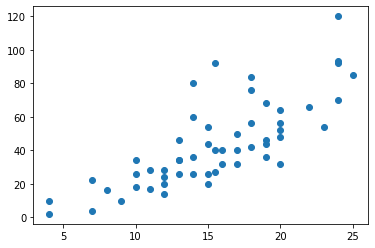

In [12]:
plt.scatter(inputs.values, output.values)

In [13]:
# Split dữ liệu và áp dụng thuật toán => in kết quả
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=23)

regr1 = linear_model.LinearRegression()
regr1 = regr1.fit(X_train, y_train)

y_pred = regr1.predict(X_test)
y_pred

array([[36.55680864],
       [36.55680864],
       [28.58912603],
       [32.57296734],
       [32.57296734],
       [52.49217386],
       [42.37934593],
       [52.49217386],
       [44.52449125],
       [32.57296734],
       [60.45985647]])

In [14]:
# Tính toán một số chỉ số liên quan:
m = regr1.coef_[0]
b = regr1.intercept_
print("slope=",m, "intercept=",b)

slope= [3.9838413] intercept= [-19.21696962]


In [15]:
#Kiểm tra độ chính xác:
print("The prediction accuracy is: ",regr1.score(X_test, np.array(y_pred))*100,"%")

The prediction accuracy is:  100.0 %


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.015799987511313285

In [17]:
y_test.dist.values

array([36., 80., 24., 34., 34., 42., 92., 84., 32., 26., 32.])

In [18]:
pd.DataFrame(y_pred)[0].values

array([36.55680864, 36.55680864, 28.58912603, 32.57296734, 32.57296734,
       52.49217386, 42.37934593, 52.49217386, 44.52449125, 32.57296734,
       60.45985647])

In [19]:
df = pd.DataFrame({'Actual': pd.Series(y_test.dist.values), 'Prediction':pd.DataFrame(y_pred)[0].values})
df

,Actual,Prediction
0,36.0,36.556809
1,80.0,36.556809
2,24.0,28.589126
3,34.0,32.572967
4,34.0,32.572967
5,42.0,52.492174
6,92.0,42.379346
7,84.0,52.492174
8,32.0,44.524491
9,26.0,32.572967


In [20]:
reg_line = [(m*float(x)) + b for x in np.array(inputs)]

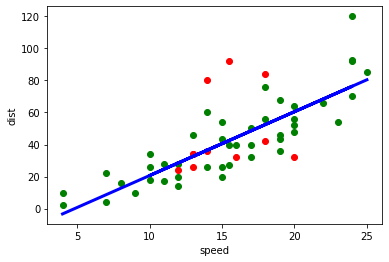

In [21]:
#plot output:
plt.scatter(X_train, y_train, color='green', label = "Training Data")
plt.scatter(X_test, y_test, color = 'red', label = "Test Data")
plt.plot(inputs, reg_line, color = 'blue', linewidth=3)
plt.xlabel("speed")
plt.ylabel("dist")
plt.show()

Một số nhận xét về kết quả:
Có thể thấy mô hình dự đoán khá chính xác khoảng cách được thực hiện để dừng lại, một số điểm được dự đoán nằm ngay trên đường hồi quy. Tuy nhiên, một số điểm vẫn còn khá xa so với kết quả thực tế.

In [22]:
# Dự đoán dist của một số speed
x_t = [[7],[10],[17],[22],[25]]
y_t = regr1.predict(x_t)
y_t 

array([[ 8.66991951],
       [20.62144342],
       [48.50833256],
       [68.42753908],
       [80.37906299]])